<a href="https://colab.research.google.com/github/abelowska/dataPy/blob/main/Classes_06_SVM_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: Support Vector Machine with non-linear kernels. Hard and soft margins


Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, balanced_accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
import io
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams["figure.figsize"] = (10,7)

In [ ]:
# constans
test_size=0.2
random_state=42

In [ ]:
def compute_score_classification(y_true, y_pred):
  '''
  Helper function for printing scores.

  Parameters:
  y_true: ndarray of y values from original dataset.
  y_pred: ndarray of y values predicted with given model.

  Return:
  dictionary object that consists of accuracy and classification report.

  '''
  return {
        "Accuracy": f"{accuracy_score(y_true, y_pred):.3f}",
        "Classification Report": classification_report(y_true, y_pred),
}

## Load dataset

In [ ]:
df = pd.read_csv('data_neo-ffi_religion.csv')
df['Orthodoxy'] = np.log(df[['Orthodoxy']].to_numpy())


# add class indicator: either External Critique or Orthodoxy
df['class'] = df[['External Critique', 'Orthodoxy']].idxmax(axis=1)
df.head()

Inspect the dataset

In [ ]:
df.describe()

## Non-linear kernels

### Exercise 1

Using the documentation, create SVM classification model: *class ~ Extraversion+ Agreeableness + Conscientiousness + Openness + Neuroticism*. Use [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from sci-kit learn.

1. Compare classification results when using three different kernels: linear, polynomial, and radial.
2. Play with different C values: try to create a model with **hard margins** and **soft margins**.
3. You can use 2 features and display boundaries, to see the differences between kernels.

In [ ]:
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism'
    ]]

y = df[['class']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Your code

---
## Data scaling

Take a look again into out X set:

In [ ]:
X.describe()

Is the magnitude (you can use standard deviation as a measure of magnitude) the same across features? If not, do you think it could affect the SVM?

**Take a look at the plots below.**

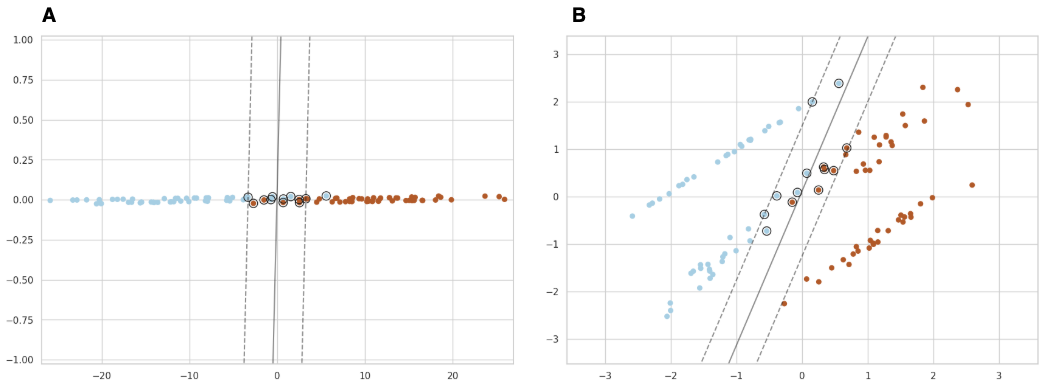

1. What are the scales (magnitudes) of the features x1 and x2 in **A** and **B**?
2. The data for both plots come from the same source, but for **B**, the data was rescaled. Did the scales matter for the boundary separation plane?

Now, you know that scales matter. They have to because SVM calculates the distance between observations, so the distance changes with the scales. It's not only the case for SVM. KNN also depends on distances, so scaling the data will affect the KNN results.

Why is this important? Imagine that you want to classify, for example, emotional responses, and your features are age (to control) in years and pupil diameter in centimeters. When comparing the variance of age, it will be much larger than the variance of pupil diameter due to the different scales. It's like the **A** plot. But we know that pupil diameter should differentiate between high and low emotional reactions. We just need to make the scales of the features comparable to "draw" the separation plane effectively.

### Exercise 2

One of the most populat way of data standarization is z-score normalization. It is a method of standardizing data by transforming the values to have a mean of 0 and a standard deviation of 1.

This process is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation of that feature. The formula for z-scoring is:

$z = \frac{X - \mu}{\sigma}$

**Try to scale your data by hand, calculating z-scores for each feature. Then, make a classification, using new, z-scored features.**

In [ ]:
X = df[[
    'Extraversion',
    'Agreeableness',
    'Conscientiousness',
    'Openness',
    'Neuroticism'
    ]]

y = df[['class']]

# Your code
# X_scaled =


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

# Your code